In [279]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline
plt.style.use('fivethirtyeight')

# FiveThirtyEight pt.1

In [59]:
spread_df = pd.read_csv("data/scrabble-point-spread.csv")

In [60]:
spread_df.head()

,player_id,points_against,points_for,tournament_id
0,6003,381,443,8163
1,20749,375,435,8163
2,19535,391,443,8163
3,18474,386,439,8163
4,583,396,450,8163


In [61]:
scores_df = pd.read_csv("data/ranked-players-with-scores.csv")

In [62]:
scores_df.head()

,current_rank,current_rating,games,losses,name,peak_rating,player_id,ties,total_prize_money,wins,points_for_against
0,1,2190,"1,765",426,David Gibson,2190,1384,5,"$174,982","1,325",433-370
1,2,2148,"1,070",386,Will Anderson,2148,19535,4,"$17,885",680,427-394
2,3,2130,"1,811",474,Nigel Richards,2307,6003,7,"$219,401","1,330",447-392
3,4,2092,744,241,Mack Meller,2092,20383,7,"$7,375",496,434-388
4,5,2081,"3,119","1,040",Ian Weinstein,2081,1847,17,"$34,858","2,062",425-382


In [63]:
scores_df.dtypes

current_rank           int64
current_rating         int64
games                 object
losses                object
name                  object
peak_rating            int64
player_id              int64
ties                   int64
total_prize_money     object
wins                  object
points_for_against    object
dtype: object

In [64]:
def split_for(row):
    return row.points_for_against.split("-")[0]

In [65]:
scores_df['for'] = scores_df.apply(split_for, axis=1).astype(int)

In [66]:
def split_against(row):
    return row.points_for_against.split("-")[1]

In [67]:
scores_df['against'] = scores_df.apply(split_against, axis=1).astype(int)

In [68]:
scores_df.dtypes

current_rank           int64
current_rating         int64
games                 object
losses                object
name                  object
peak_rating            int64
player_id              int64
ties                   int64
total_prize_money     object
wins                  object
points_for_against    object
for                    int32
against                int32
dtype: object

In [78]:
def build_colors(x):
    if x.player_id == 6003:
        return 'red'
    else:
        return 'gray'
    
colors = scores_df.sort_values(by='current_rank').head(50).reset_index().apply(build_colors, axis=1)
colors.head()

0    gray
1    gray
2     red
3    gray
4    gray
dtype: object

In [147]:
scores_df[scores_df.player_id == 6003]

,current_rank,current_rating,games,losses,name,peak_rating,player_id,ties,total_prize_money,wins,points_for_against,for,against
2,3,2130,"1,811",474,Nigel Richards,2307,6003,7,"$219,401","1,330",447-392,447,392


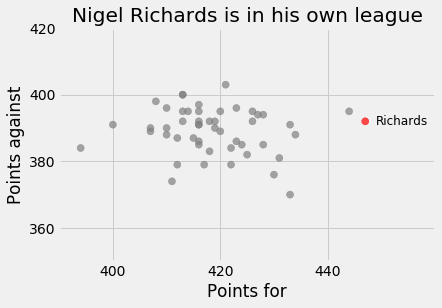

In [146]:
ax = scores_df.sort_values(by='current_rank').head(50).plot(kind='scatter', x='for', y='against', color=colors, alpha=.7, s=50)
ax.set_title('Nigel Richards is in his own league')
# ax.suptitle('Lifetime average scores of the current top 50 Scrabble players.')
ax.text(449, 391, "Richards", fontsize=12)
ax.set_ylim(350, 420)
ax.set_xlim(390, 460)
ax.set_yticks([360,380,400,420])
ax.set_xticks([400,420, 440])
ax.set_xlabel('Points for')
ax.set_ylabel('Points against')
plt.savefig('538_1.pdf', transparent=False)

<hr>

# FiveThirtyEight pt.2

In [148]:
point_df = pd.read_csv("data/scrabble-point-spread.csv")
rating_df = pd.read_csv("data/scrabble-tournament.csv")

In [149]:
point_df.head()

,player_id,points_against,points_for,tournament_id
0,6003,381,443,8163
1,20749,375,435,8163
2,19535,391,443,8163
3,18474,386,439,8163
4,583,396,450,8163


In [150]:
rating_df.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,NaN,NaN,7,Nigel Richards,2196,2168.0,NaN,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1
1,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,NaN,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1
2,NaN,NaN,8,Will Anderson,2093,2054.0,NaN,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1
3,NaN,NaN,9,Noah Walton,2063,2015.0,NaN,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1
4,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,NaN,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1


In [152]:
merged_df = point_df.merge(rating_df, left_on='player_id', right_on='Player ID')

In [156]:
merged_df.head()

,player_id,points_against,points_for,tournament_id,Byes,Credits,Losses,Name,New Rating,Old Rating,...,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,6003,381,443,8163,NaN,NaN,7,Nigel Richards,2196,2168.0,...,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1
1,20749,375,435,8163,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,...,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1
2,19535,391,443,8163,NaN,NaN,8,Will Anderson,2093,2054.0,...,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1
3,18474,386,439,8163,NaN,NaN,9,Noah Walton,2063,2015.0,...,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1
4,583,396,450,8163,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,...,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1


In [293]:
def build_colors(x):
    if x.division == "Division 1":
        return 'red'
    elif x.division == "Division 2":
        return 'gold'
    elif x.division == "Division 3":
        return 'green'
    else:
        return '#3AA4DB'

colors = merged_df.reset_index().apply(build_colors, axis=1)

In [294]:
merged_df[merged_df['Player ID'] == 6003]

,player_id,points_against,points_for,tournament_id,Byes,Credits,Losses,Name,New Rating,Old Rating,...,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,6003,381,443,8163,NaN,NaN,7,Nigel Richards,2196,2168.0,...,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1


In [295]:
colors.value_counts()

green      138
red        125
gold       123
#3AA4DB     95
dtype: int64

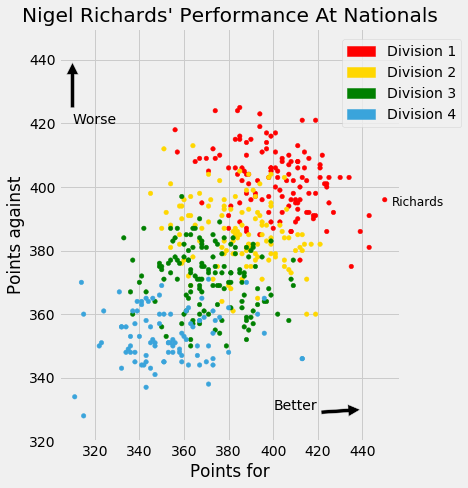

In [367]:
ax = merged_df.plot(kind='scatter', x='points_for', y='points_against', color=colors, legend=True, alpha=1, figsize=(7,7))
ax.set_title("Nigel Richards' Performance At Nationals")

red_color = mpatches.Patch(color='red', label='Division 1')
gold_color = mpatches.Patch(color='gold', label='Division 2')
green_color = mpatches.Patch(color='green', label='Division 3')
blue_color = mpatches.Patch(color='#3AA4DB', label='Division 4')

ax.legend(handles=[red_patch, gold_color, green_color, blue_color], bbox_to_anchor=(1.2, .99))


ax.set_ylim(320, 450)
ax.set_yticks([320,340,360,380,400,420, 440])
ax.set_xticks([320,340,360,380,400,420, 440])


ax.set_xlabel('Points for')
ax.set_ylabel('Points against')
ax.annotate('Better', xy=(440,330), xytext=(400,330),
            arrowprops=dict(facecolor='black', shrink=.05))
ax.annotate('Worse', xy=(310,440), xytext=(310,420),
            arrowprops=dict(facecolor='black', shrink=.05))
ax.text(453, 394, "Richards", fontsize=12)


plt.tight_layout()
plt.savefig('538_2.pdf', facecolor='#F0F0F0', edgecolor='none')